## Case study

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from dateutil import rrule
import matplotlib.dates as mdates

In [32]:
data = pd.read_csv('customer_data.csv')
subscription_prices = pd.read_json('subscription_prices.json')
data

,cust_id,transaction_type,transaction_date,subscription_type,subscription_price,customer_gender,age_group,customer_country,referral_type
0,1,initial,2020-09-01,BASIC,33,Male,35-44,Denmark,Google Ads
1,2,initial,2022-03-01,BASIC,53,Female,18-24,Denmark,facebook
2,3,initial,2020-10-01,MAX,99,Female,25-34,Norway,facebook
3,3,REDUCTION,2022-02-01,BASIC,53,Female,25-34,Norway,facebook
4,4,initial,2022-05-01,PRO,85,Male,18-24,Sweden,Display
...,...,...,...,...,...,...,...,...,...
18101,10364,UPGRADE,2022-09-01,MAX,119,Female,45-54,Norway,facebook
18102,10365,initial,2021-05-01,PRO,75,Male,55-65,Norway,Google Ads
18103,10365,REDUCTION,2021-07-01,BASIC,43,Male,55-65,Norway,Google Ads
18104,10366,initial,2021-01-01,BASIC,43,Male,18-24,Denmark,facebook


In [33]:
# Double check NaNs and unique values
for col in data:
    print(data[col].unique())

data.isna().sum()

[    1     2     3 ... 10364 10365 10366]
['initial' 'REDUCTION' 'CHURN' 'UPGRADE']
['2020-09-01' '2022-03-01' '2020-10-01' '2022-02-01' '2022-05-01'
 '2022-08-01' '2022-06-01' '2021-01-01' '2021-04-01' '2020-08-01'
 '2021-03-01' '2022-09-01' '2020-05-01' '2022-01-01' '2020-03-01'
 '2020-07-01' '2020-12-01' '2022-11-01' '2021-12-01' '2021-11-01'
 '2022-10-01' '2021-09-01' '2021-05-01' '2022-04-01' '2021-02-01'
 '2022-07-01' '2020-06-01' '2020-02-01' '2020-11-01' '2021-06-01'
 '2021-10-01' '2021-08-01' '2020-04-01' '2021-07-01' '2020-01-01'
 '2022-12-01']
['BASIC' 'MAX' 'PRO']
[ 33  53  99  85 119  43  65  75 109]
['Male' 'Female' 'Other']
['35-44' '18-24' '25-34' '55-65' '45-54']
['Denmark' 'Norway' 'Sweden' 'Finland']
['Google Ads' 'facebook' 'Display' 'Organic Search' 'Unknown' 'Bing'
 'Paid Search' 'TV']


cust_id               0
transaction_type      0
transaction_date      0
subscription_type     0
subscription_price    0
customer_gender       0
age_group             0
customer_country      0
referral_type         0
dtype: int64

In [34]:
data.nunique()

cust_id               10366
transaction_type          4
transaction_date         36
subscription_type         3
subscription_price        9
customer_gender           3
age_group                 5
customer_country          4
referral_type             8
dtype: int64

In [35]:
# Double-check data types
print(type(data.loc[0].at['cust_id']), "\n",
      type(data.loc[0].at['transaction_type']), "\n",
      type(data.loc[0].at['transaction_date']), "\n",
      type(data.loc[0].at['subscription_type']), "\n",
      type(data.loc[0].at['subscription_price']), "\n",
      type(data.loc[0].at['customer_gender']), "\n",
      type(data.loc[0].at['age_group']), "\n",
      type(data.loc[0].at['customer_country']), "\n",
      type(data.loc[3].at['referral_type']), "\n")           #First not-null at index 3

<class 'numpy.int64'> 
 <class 'str'> 
 <class 'str'> 
 <class 'str'> 
 <class 'numpy.int64'> 
 <class 'str'> 
 <class 'str'> 
 <class 'str'> 
 <class 'str'> 



In [36]:
# Convert datatype of 'transaction_date' column from str to datetime
data['transaction_date'] = pd.to_datetime(data['transaction_date']).dt.date

#### Exploratory Data Analysis

##### Distribution in categorical columns

In [37]:
# Create list of customers
customers = pd.DataFrame({'cust_id' : data['cust_id'], 'customer_gender' : data['customer_gender'], 'age_group' : data['age_group'], 'customer_country' : data['customer_country']}).sort_values('cust_id', ascending=True).drop_duplicates()
customers

,cust_id,customer_gender,age_group,customer_country
0,1,Male,35-44,Denmark
1,2,Female,18-24,Denmark
2,3,Female,25-34,Norway
4,4,Male,18-24,Sweden
5,5,Male,35-44,Sweden
...,...,...,...,...
18095,10362,Female,25-34,Denmark
18098,10363,Female,18-24,Finland
18100,10364,Female,45-54,Norway
18102,10365,Male,55-65,Norway


Text(0.5, 0, 'Customer Country')

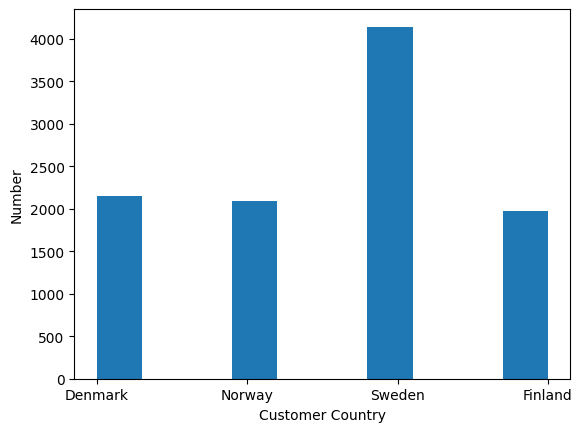

In [38]:
# Plot number of customers (including x-customers) per country
plt.hist(customers['customer_country'])
plt.ylabel('Number')
plt.xlabel('Customer Country')

Text(0.5, 0, 'Customer Gender')

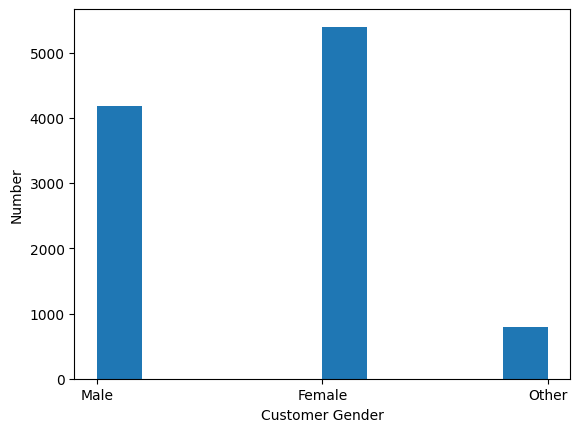

In [39]:
# Plot number of customers (including x-customers) per gender
plt.hist(customers['customer_gender'])
plt.ylabel('Number')
plt.xlabel('Customer Gender')

Text(0.5, 0, 'Age Group')

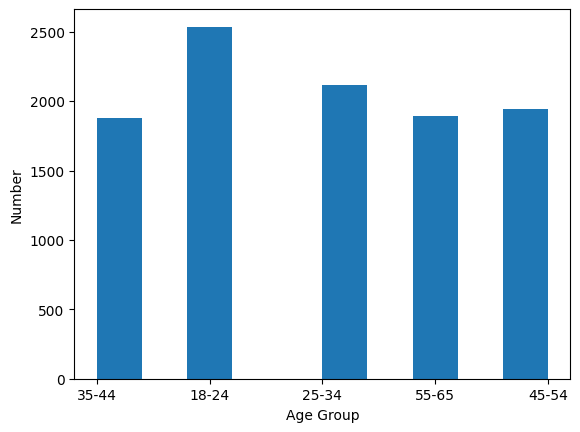

In [40]:
# Plot number of customers (including x-customers) per age group
plt.hist(customers['age_group'])
plt.ylabel('Number')
plt.xlabel('Age Group')

Text(0.5, 0, 'Transaction Type')

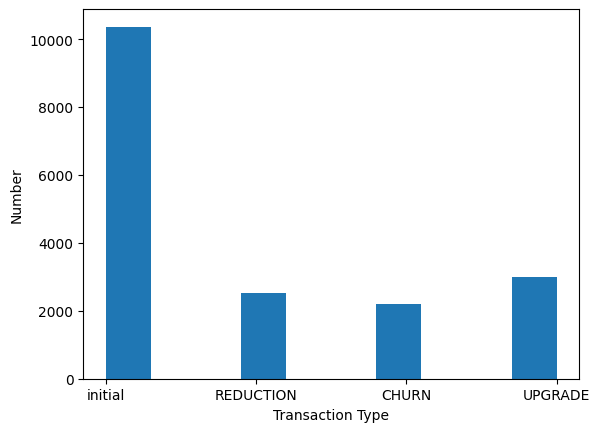

In [41]:
plt.hist(data['transaction_type'])
plt.ylabel('Number')
plt.xlabel('Transaction Type')

In [42]:
pd.crosstab(data.referral_type, data.transaction_type)

transaction_type,CHURN,REDUCTION,UPGRADE,initial
referral_type,,,,
Bing,52,48,62,212
Display,65,92,95,340
Google Ads,718,831,969,3366
Organic Search,229,319,401,1248
Paid Search,233,255,324,1058
TV,89,102,102,388
Unknown,161,164,236,732
facebook,648,728,817,3022


##### K-Means Clustering (test)

In [43]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

trans_date_transformed = ordinal_encoder.fit_transform(data[['transaction_date']])
age_group_transformed = ordinal_encoder.fit_transform(data[['age_group']])

In [44]:
data_num = data.copy()

data_num['transaction_date'] = pd.Series(trans_date_transformed.T[0])
data_num['age_group'] = pd.Series(age_group_transformed.T[0])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


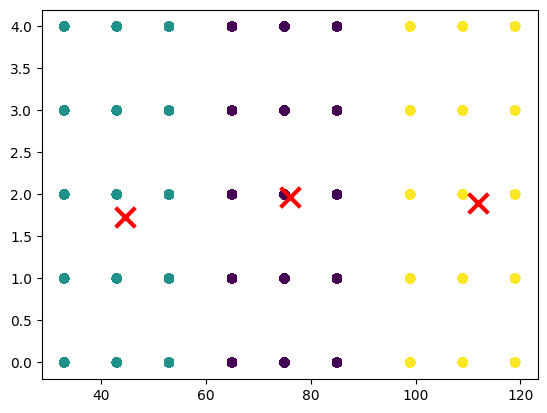

In [45]:
from sklearn.cluster import KMeans

X = data_num[['subscription_price', 'age_group']].to_numpy()
kmeans = KMeans(n_clusters=3).fit(X)

# Get the assigned labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the data points with their assigned labels
plt.scatter(X[:, 0], X[:, 1], c=labels)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')

##### Revenue over time

In [46]:
start_date = datetime.date(2020, 1, 1)
end_date = datetime.date(2022, 12, 31)

In [47]:
# Get the subscription type in a given month for each customer
def get_current_price(df : pd.DataFrame, date : datetime) -> pd.DataFrame:
    # Filter the DataFrame to include only records before the given date
    df = df[df['transaction_date'] <= date]

    # Sort the DataFrame by transaction_date in descending order
    df = df.sort_values('transaction_date', ascending=False)

    # Drop duplicates of cust_id, keeping only the most recent subscription price
    df = df.drop_duplicates(subset=['cust_id'], keep='first')

    # Sort the DataFrame by cust_id in ascending order
    df = df.sort_values('cust_id', ascending=True)

    # Create a DataFrame that holds only the most recent subscription price
    res = pd.DataFrame(df['subscription_price'])

    return res

In [48]:
# Insert most recent subscription prices in revenue DataFrame
revenue = customers.copy()

for dt in rrule.rrule(rrule.MONTHLY, dtstart=start_date, until=end_date):
    dt = dt.date()
    year_month = dt.strftime("%b, %Y")
    revenue[year_month] = get_current_price(data, dt)['subscription_price']

expense_per_cust = revenue.drop(columns=['customer_gender', 'age_group', 'customer_country']).fillna(0)
total_expense_per_cust = revenue.iloc[:, 4:-1].sum(axis=1)
revenue = revenue.drop(columns='cust_id')

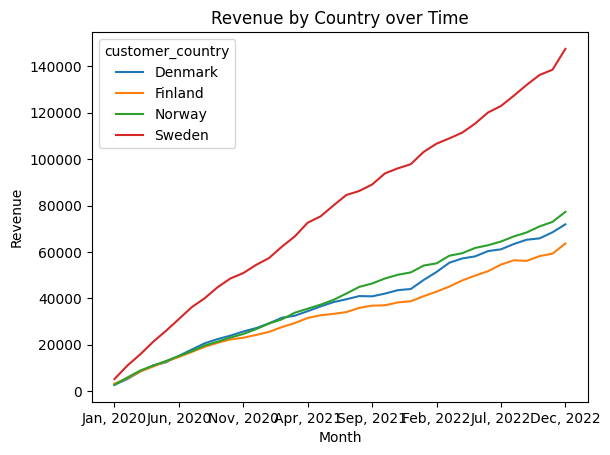

In [49]:
# Group the revenue by country
revenue_by_country = revenue.groupby('customer_country').sum(numeric_only=True)

# Plot the revenue by country over time
revenue_by_country = revenue_by_country.T
revenue_by_country.plot(kind='line')
plt.title('Revenue by Country over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

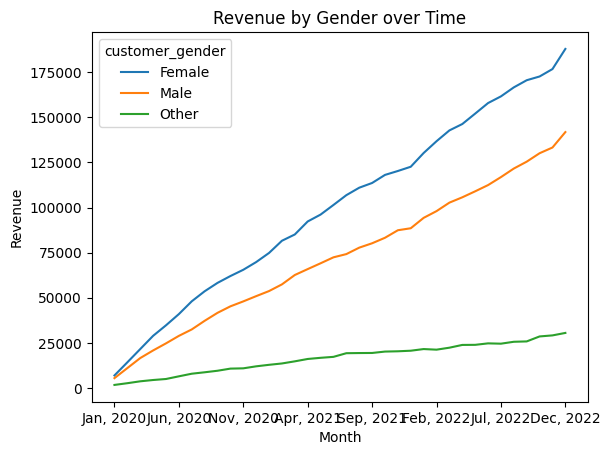

In [50]:
# Group the revenue by gender
revenue_by_gender = revenue.groupby('customer_gender').sum(numeric_only=True)

# Plot the revenue by gender over time
revenue_by_gender = revenue_by_gender.T
revenue_by_gender.plot(kind='line')
plt.title('Revenue by Gender over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

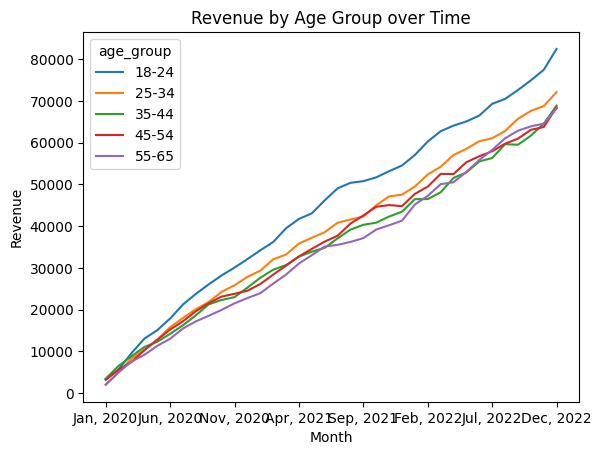

In [51]:
# Group the revenue by age group
revenue_by_age_group = revenue.groupby('age_group').sum(numeric_only=True)

# Plot the revenue by age group over time
revenue_by_age_group = revenue_by_age_group.T
revenue_by_age_group.plot(kind='line')
plt.title('Revenue by Age Group over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

##### Churn Rate over time

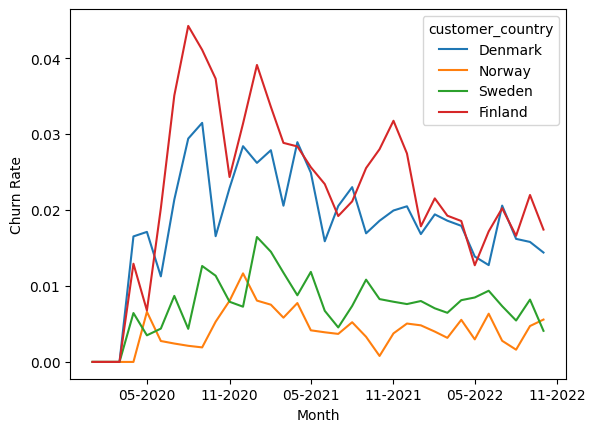

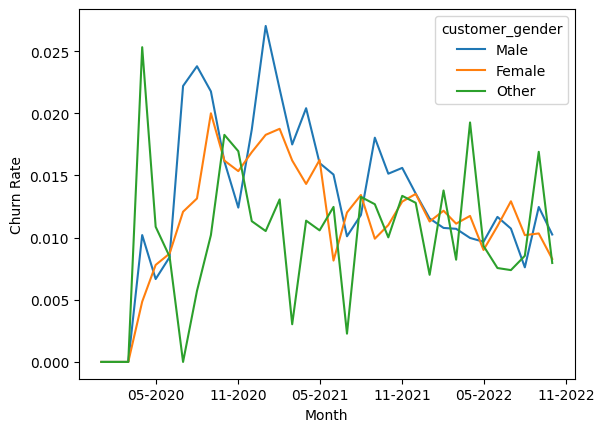

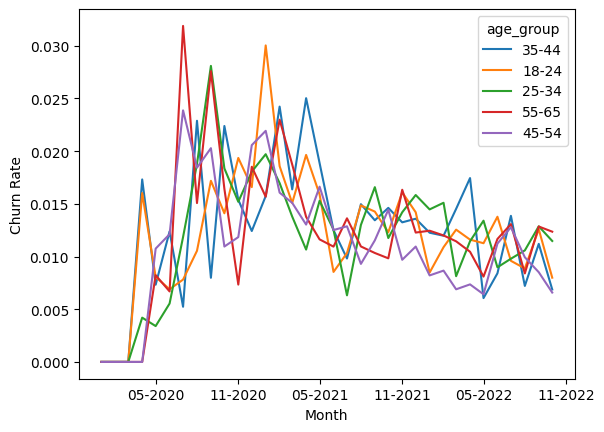

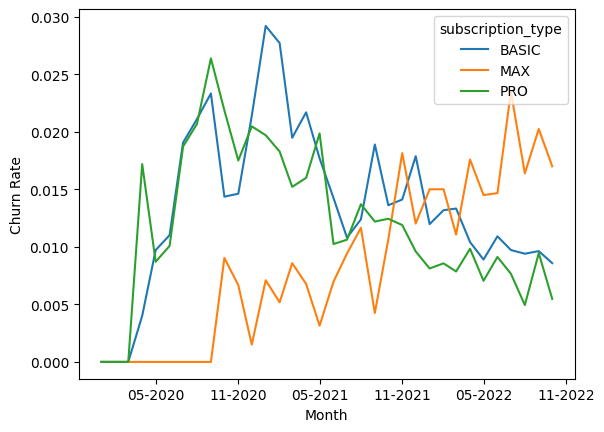

In [52]:
def plot_churn_rate(data : pd.DataFrame, attribute : str):
    for cat in data[attribute].unique():
        # Get subset of data per category
        cat_data = data[data[attribute] == cat]

        # Get churn and initial transactions
        churn_data = cat_data[cat_data['transaction_type'] == 'CHURN']
        initial_data = cat_data[cat_data['transaction_type'] == 'initial']

        # Count the number of churned customers each month
        churn_counts = churn_data.groupby(['transaction_date'])['cust_id'].nunique()

        # Count the total number of new customers each month
        initial_counts = initial_data.groupby(['transaction_date'])['cust_id'].nunique()

        # Count the total number of active customers in each month
        cust_counts = initial_counts.cumsum().subtract(churn_counts, fill_value=0)

        # Calculate churn rate for each month
        churn_rate = churn_counts.divide(cust_counts, fill_value=0)

        # Remove zero at end of series
        churn_rate = churn_rate[0:-2]

        # Plot the churn rate over time for each customer country
        ax = churn_rate.plot(kind='line', label=cat)

        # Format the x-axis tick labels to show only every 6th month
        ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=6))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

    # Add a legend and labels to the plot
    plt.legend(title=attribute)
    plt.ylabel('Churn Rate')
    plt.xlabel('Month')
    plt.show()

# Plot churn rate per category for categorical columns
plot_churn_rate(data, 'customer_country')
plot_churn_rate(data, 'customer_gender')
plot_churn_rate(data, 'age_group')
plot_churn_rate(data, 'subscription_type')

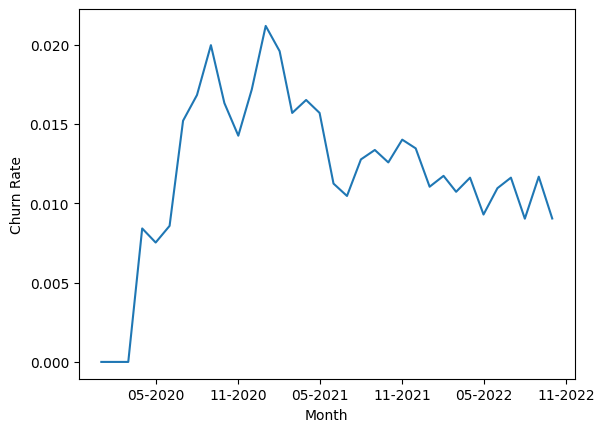

In [53]:
# Get churn and initial transactions
churn_data = data[data['transaction_type'] == 'CHURN']
initial_data = data[data['transaction_type'] == 'initial']
# Count the number of churned customers each month
churn_counts = churn_data.groupby(['transaction_date'])['cust_id'].nunique()
# Count the total number of new customers each month
initial_counts = initial_data.groupby(['transaction_date'])['cust_id'].nunique()
# Count the total number of active customers in each month
cust_counts = initial_counts.cumsum().subtract(churn_counts, fill_value=0)
# Calculate churn rate for each month
churn_rate = churn_counts.divide(cust_counts, fill_value=0)
# Remove zero at end of series
churn_rate = churn_rate[0:-2]
# Plot the churn rate over time for each customer country
ax = churn_rate.plot(kind='line')
# Format the x-axis tick labels to show only every 6th month
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1, interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
# Add a legend and labels to the plot
plt.ylabel('Churn Rate')
plt.xlabel('Month')
plt.show()

#### Predictive analysis

##### Predict per transaction (test)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [55]:
# Split and perform fit, then predict using Logistic Regression on the given dataset
def split_fit_predict(X : pd.DataFrame, y : pd.DataFrame, test_size : float):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    # Train the model
    model = LogisticRegression(penalty="l2")
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', accuracy)
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

In [56]:
# Select relevant features
X = data[['age_group', 'customer_country', 'subscription_type', 'subscription_price', 'customer_gender', 'referral_type']]
y = data['transaction_type']

# Encode categorical variables
X = pd.get_dummies(X)
y = (y == "CHURN")

split_fit_predict(X, y, 0.2)

Accuracy: 0.8801766979569299
Precision: 0.0
Recall: 0.8801766979569299
[[3188    0]
 [ 434    0]]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# Ordinal encoder is used to encode age group, since there is already an inherent distance between the categories in this feature
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [58]:
# Select relevant features
X = data[['age_group', 'customer_country', 'subscription_type', 'customer_gender']]
y = data['transaction_type']

# Encode categorical variables with ordinal encoder
X['age_group'] = ordinal_encoder.fit_transform(X[['age_group']])

# Encode categorical variables with one-hot encoder
X = pd.get_dummies(X)
y = (y == "CHURN")

split_fit_predict(X, y, 0.2)

# Problem of 0 precision can be solved by oversampling imbalanced features

Accuracy: 0.8818332413031474
Precision: 0.0
Recall: 0.8818332413031474
[[3194    0]
 [ 428    0]]


/var/folders/p9/37n8_h0j3w136cfjm88xkpcr0000gn/T/ipykernel_7679/2247982242.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age_group'] = ordinal_encoder.fit_transform(X[['age_group']])
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Predict per customer

In [59]:
# FEATURE ENGINEERING
# Create list of customers
customers = pd.DataFrame({'cust_id' : data['cust_id'], 'customer_gender' : data['customer_gender'], 'age_group' : data['age_group'], 'customer_country' : data['customer_country']}).sort_values('cust_id', ascending=True).drop_duplicates()

# Get most recent transaction for each customer
most_recent_transactions = data.groupby('cust_id')['transaction_type'].last().reset_index()
most_recent_transactions['transaction_type'] = (most_recent_transactions['transaction_type'] == "CHURN")
most_recent_transactions = most_recent_transactions.rename(columns={'transaction_type': 'churned'})

# Get most recent subscription type for each customer
most_recent_subscription_type = data.groupby('cust_id')['subscription_type'].last().reset_index()

# Get number of days since first transaction for each customer
days_as_customer = data.groupby('cust_id')['transaction_date'].first().reset_index()
days_as_customer['transaction_date'] = end_date - days_as_customer['transaction_date']
days_as_customer['transaction_date'] = days_as_customer['transaction_date'].dt.days
days_as_customer = days_as_customer.rename(columns={'transaction_date': 'days_as_customer'})

# Get the referral type of the first transaction for each customer
first_referral = data.groupby('cust_id')['referral_type'].first().reset_index()
first_referral = first_referral.rename(columns={'referral_type': 'first_referral'})

# Add new features to the `customers` dataframe
customers = customers.join(most_recent_subscription_type.set_index('cust_id'), on='cust_id')
customers = customers.join(days_as_customer.set_index('cust_id'), on='cust_id')
customers = customers.join(first_referral.set_index('cust_id'), on='cust_id')
customers['total_expenses'] = total_expense_per_cust
#customers = customers.join(expense_per_cust.set_index('cust_id'), on='cust_id')    # Might be too many features
customers = customers.join(most_recent_transactions.set_index('cust_id'), on='cust_id')

In [60]:
# Import oversampling package
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()

# Select relevant features
X = customers.drop(columns=['cust_id', 'churned'])
y = customers['churned']

# Encode age group with ordinal encoder
X['age_group'] = ordinal_encoder.fit_transform(X[['age_group']])

# Oversample the data to account for imbalances. Ex. Ratio of churned to existing customers is abouth 1/4
X, y = oversampler.fit_resample(X, y)

# Encode categorical variables with one-hot encoder
X = pd.get_dummies(X)

# Make predictions of customer churn
split_fit_predict(X, y, 0.2)

Accuracy: 0.7717979555021046
Precision: 0.7747183979974969
Recall: 0.7717979555021046
[[1329  360]
 [ 399 1238]]
